In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pysal as ps
import esda as es

In [2]:
plt.style.use('ggplot')

In [3]:
data=pd.read_csv('combined_data_with_loc.csv')
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.230377,4.251470
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.212552,3.839001
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,27.049690
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,27.933349,0.047723
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,12.021947


In [4]:
# load the feature category dictionary
import json
with open('feature_category_dict.json') as f:
	fcmap = json.load(f)

In [5]:
# use the subsset 'Services' category
data_services = data[fcmap['Services']]
data_services.head()

,Public Hospitals,Private Hospitals,Community Health Centres,Bush Nursing Centres,Allied Health,Alternative Health,Child Protection and Family,Dental,Disability,General Practice,...,Aged Care (Low Care),Aged Care (SRS),Kinder and/or Childcare,Primary Schools,Secondary Schools,P12 Schools,Other Schools,Centrelink Offices,Medicare Offices,Medicare Access Points
0,0,1,1,0,10,5,0,0,0,2,...,31,0,4,3,0,0,1,0,0,0
1,0,0,1,0,13,1,0,1,1,4,...,0,0,1,2,2,0,1,0,0,0
2,1,0,1,0,15,0,0,1,1,8,...,0,0,2,6,1,1,0,0,0,0
3,0,1,0,0,30,8,0,7,9,9,...,179,45,10,5,2,0,0,0,0,0
4,0,0,1,0,13,1,0,1,0,5,...,150,0,3,4,1,1,0,0,0,0


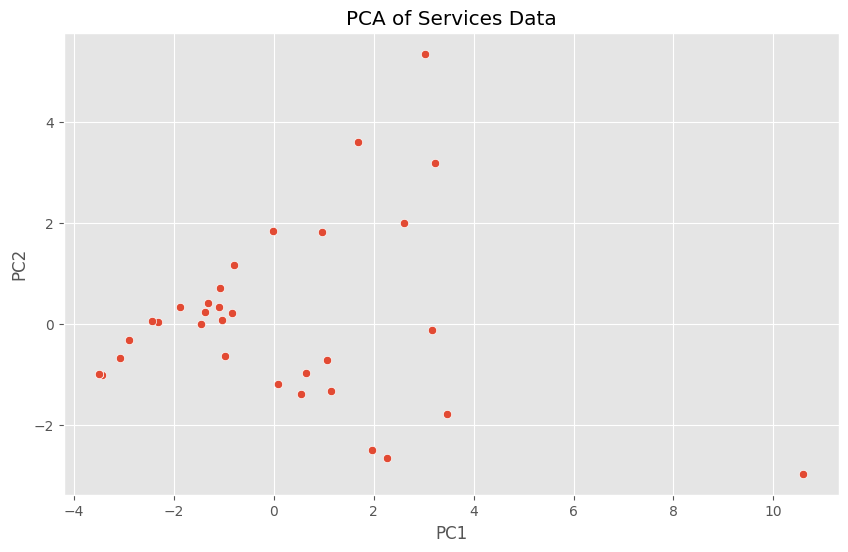

Moran's I: 0.2872990499187528
P-value: 0.2912


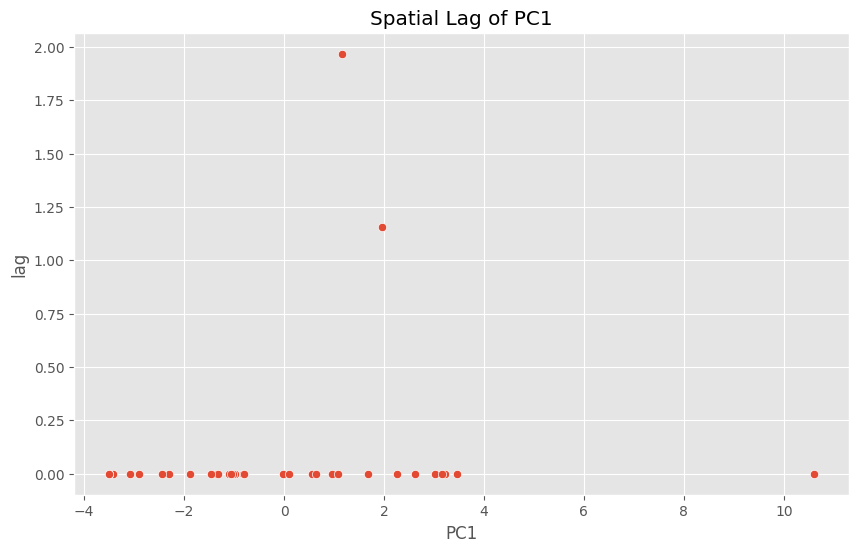

0     -1.101683
1     -1.370459
2     -0.829854
3      3.223687
4     -0.802997
5     10.599530
6      1.680996
7      0.959804
8      0.556730
9     -3.426910
10    -0.014618
11    -0.978299
12    -1.314884
13    -2.307097
14     3.023268
15     0.640674
16     2.612857
17     1.070537
18    -2.441440
19    -1.457164
20     1.967920
21    -1.872934
22    -2.894906
23     2.261917
24     1.155917
25     3.162771
26    -3.496505
27    -1.028193
28     3.468572
29    -3.496505
30     0.094370
31    -3.079755
32    -3.496505
33    -1.068843
Name: PC1, dtype: float64

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import libpysal as ps
from esda.moran import Moran
import geopandas as gpd
from shapely.geometry import Point

def metric_services(data_services):
	# Standardize the data
	scaler = StandardScaler()
	data_services_scaled = scaler.fit_transform(data_services)
	
	# Apply PCA
	pca = PCA(n_components=2)
	data_services_pca = pca.fit_transform(data_services_scaled)
	
	# Create a dataframe
	data_services_pca_df = pd.DataFrame(data_services_pca, columns=['PC1', 'PC2'])
	
	# Add coordinates (assuming X and Y columns exist in the original data)
	data_services_pca_df['x'] = data['cart_x']
	data_services_pca_df['y'] = data['cart_y']
	
	# Convert to a GeoDataFrame
	gdf = gpd.GeoDataFrame(
		data_services_pca_df, 
		geometry=gpd.points_from_xy(data_services_pca_df['x'], data_services_pca_df['y'])
	)
	
	# Plot the data
	plt.figure(figsize=(10, 6))
	sns.scatterplot(x='PC1', y='PC2', data=data_services_pca_df)
	plt.title('PCA of Services Data')
	plt.show()
	
	# Compute Moran's I
	w = ps.weights.DistanceBand.from_dataframe(gdf, threshold=1, silence_warnings=True)
	moran = Moran(data_services_pca_df['PC1'], w, permutations=9999)
	print('Moran\'s I:', moran.I)
	# print the p-value
	print('P-value:', moran.p_sim)
	
	# Plot the spatial lag
	lag = ps.weights.lag_spatial(w, data_services_pca_df['PC1'])
	data_services_pca_df['lag'] = lag
	plt.figure(figsize=(10, 6))
	sns.scatterplot(x='PC1', y='lag', data=data_services_pca_df)
	plt.title('Spatial Lag of PC1')
	plt.show()
	
	# return the first principal component
	return data_services_pca_df['PC1']

# Example usage (make sure `data_services` is defined and has 'x' and 'y' columns):
metric_services(data_services)


c:\Users\subha\miniconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


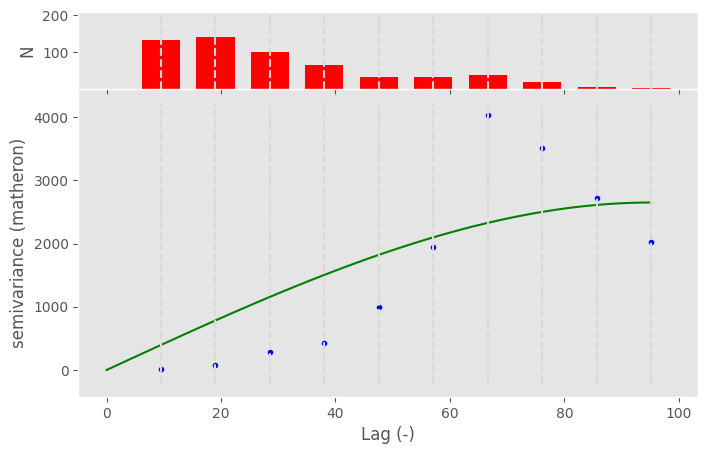

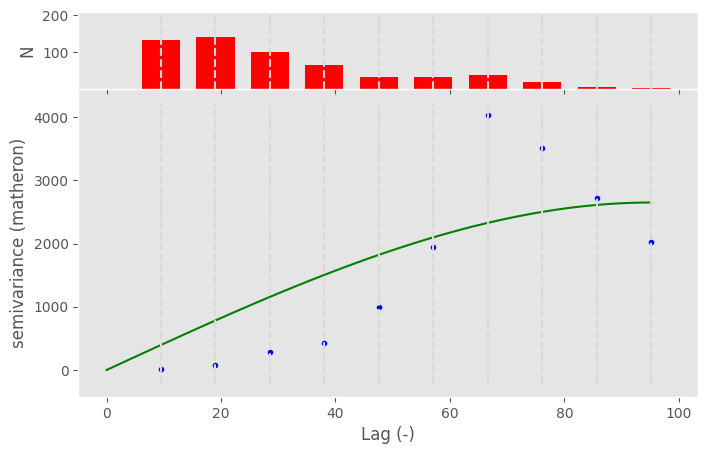

In [22]:
from skgstat import Variogram


# create gdf
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['cart_x'], data['cart_y'])
)
# Assume `coords` are the coordinates and `values` are the attribute values
coords = list(zip(gdf.geometry.x, gdf.geometry.y))
values = gdf['Distance to GPO (km)'].values
variogram = Variogram(coords, values, normalize=False)
variogram.plot()


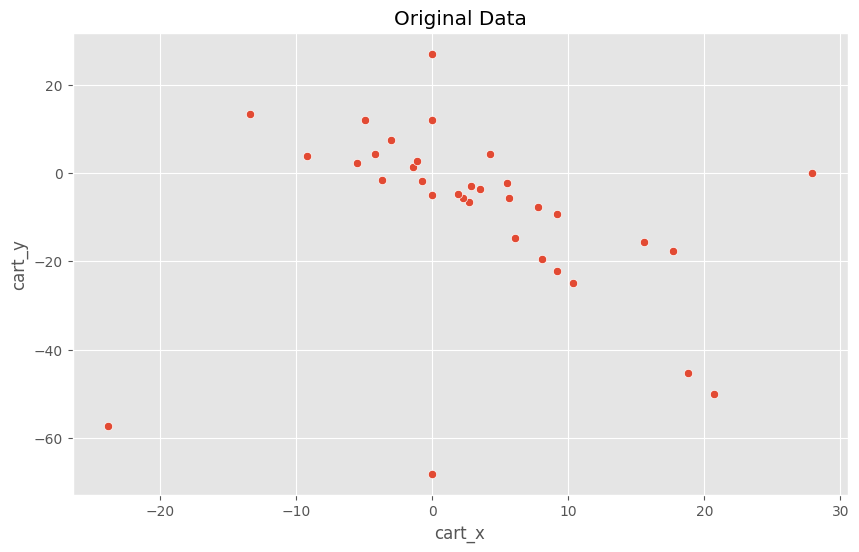

In [13]:
# plot boxes around the points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cart_x', y='cart_y', data=data)
plt.title('Original Data')
plt.show()

Moran's I: 0.44816533139199993
P-value: 0.0072
Geary's C: 0.02819939251325647
P-value: 0.001


c:\Users\subha\miniconda3\Lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


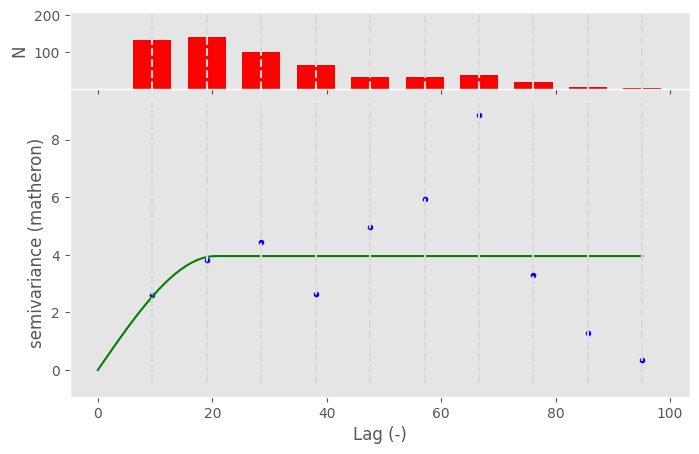

In [21]:
# compute moran's I for the population density

# Compute Moran's I
w = ps.weights.DistanceBand.from_dataframe(gdf, threshold=7, silence_warnings=True)
moran = Moran(gdf['Distance to GPO (km)'], w, permutations=9999)
print('Moran\'s I:', moran.I)
# print the p-value
print('P-value:', moran.p_sim)

# compute Geary's C for the population density
geary = es.Geary(gdf['Distance to GPO (km)'], w)
print('Geary\'s C:', geary.C)
# print the p-value
print('P-value:', geary.p_sim)

# compute the semivariogram for the population density
coords = list(zip(gdf.geometry.x, gdf.geometry.y))
values = gdf['Population Density'].values
variogram = Variogram(coords, values)
variogram.plot()
plt.show()

# compute geographical weighted regression for the population density
from pysal.model import spreg
import numpy as np
import pandas as pd

# Create a dataframe
df = pd.DataFrame({
    'Population Density': gdf['Population Density'],
    'X': gdf.geometry.x,
    'Y': gdf.geometry.y
})

# Create a spatial lag
w = ps.weights.DistanceBand.from_dataframe(gdf, threshold=1, silence_warnings=True)
y = np.array(df['Population Density']).reshape(-1, 1)
X = np.array(df[['X', 'Y']])
X = np.hstack([np.ones((X.shape[0], 1)), X])
# model = spreg.GM_Lag(y, X, w, name_y='Population Density', name_x=['Intercept', 'X', 'Y'])
# print(model.summary)


In [9]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import geopandas as gpd

# Create a DataFrame with Population Density and coordinates
df = pd.DataFrame({
    'Population Density': gdf['Population Density'],
    'X': gdf.geometry.x,
    'Y': gdf.geometry.y
})

# Define response variable (y) and predictors (X)
y = np.array(df['Population Density']).reshape(-1, 1)
X = np.array(df[['X', 'Y']])

# Select bandwidth for GWR, using a smaller max_neighbors parameter
coords = np.array(list(zip(df['X'], df['Y'])))
selector = Sel_BW(coords, y, X)
# Specify a smaller bandwidth manually, e.g., 10
bw = 4  # Choose an appropriate smaller value based on your data size
gwr_model = GWR(coords, y, X, bw)
gwr_results = gwr_model.fit()
print(gwr_results.summary())





Model type                                                         Gaussian
Number of observations:                                                  34
Number of covariates:                                                     3

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       112937308.579
Log-likelihood:                                                    -303.516
AIC:                                                                613.031
AICc:                                                               616.411
BIC:                                                           112937199.261
R2:                                                                   0.137
Adj. R2:                                                              0.082

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ----

In [10]:
df = data_services
df['X']=data['cart_x']
df['Y']=data['cart_y']

C:\Users\subha\AppData\Local\Temp\ipykernel_10912\2380100068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X']=data['cart_x']
C:\Users\subha\AppData\Local\Temp\ipykernel_10912\2380100068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y']=data['cart_y']


In [14]:
#plot co-ordinates of suburbs
# find out the mean distance to nearest 3 points
# use co-ordinates of the points

# compute the mean distance to the nearest 3 points
from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors object
nn = NearestNeighbors(n_neighbors=4)
# Fit the model
nn.fit(df[['X', 'Y']])
# Find the distances and indices of the nearest neighbors
distances, indices = nn.kneighbors(df[['X', 'Y']])
# Compute the mean distance to the nearest 3 points
mean_distance = distances[:, 1:].mean(axis=1)
df['mean_distance'] = mean_distance
df['mean_distance']

C:\Users\subha\AppData\Local\Temp\ipykernel_10912\3727109530.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_distance'] = mean_distance


0      3.042855
1      5.369882
2     16.634864
3     20.444691
4      6.445793
5      3.515254
6      5.925756
7      3.419722
8      3.027457
9     10.340330
10     4.673832
11     6.200217
12     4.673832
13     4.461920
14     7.469826
15     2.814364
16     6.188312
17     3.071520
18     4.459217
19     3.640341
20     1.768868
21    17.364473
22    38.551222
23     3.173808
24     1.924805
25     6.817928
26    27.760812
27     2.018492
28     1.452812
29     2.451698
30     2.829073
31    19.877651
32     6.452360
33     1.632808
Name: mean_distance, dtype: float64

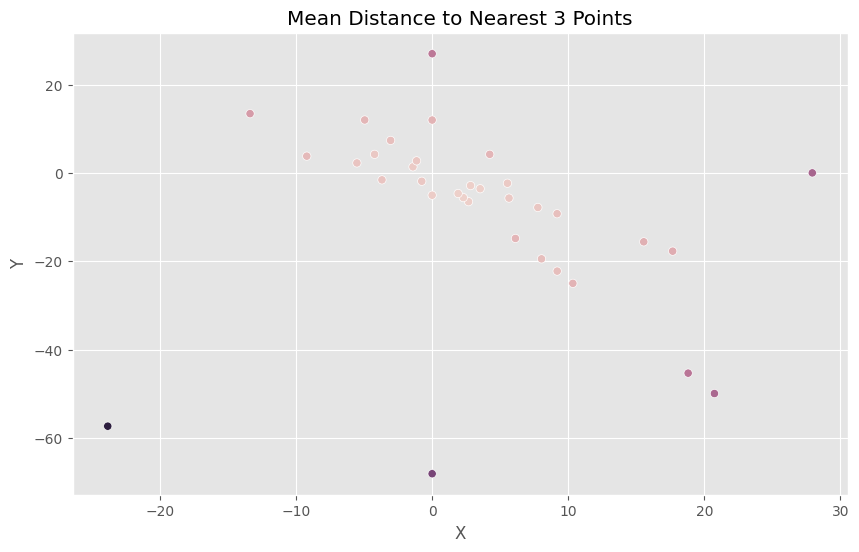

In [15]:
# plot the mean distance to the nearest 3 points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', hue='mean_distance', data=df, legend=False)
plt.title('Mean Distance to Nearest 3 Points')
plt.show()


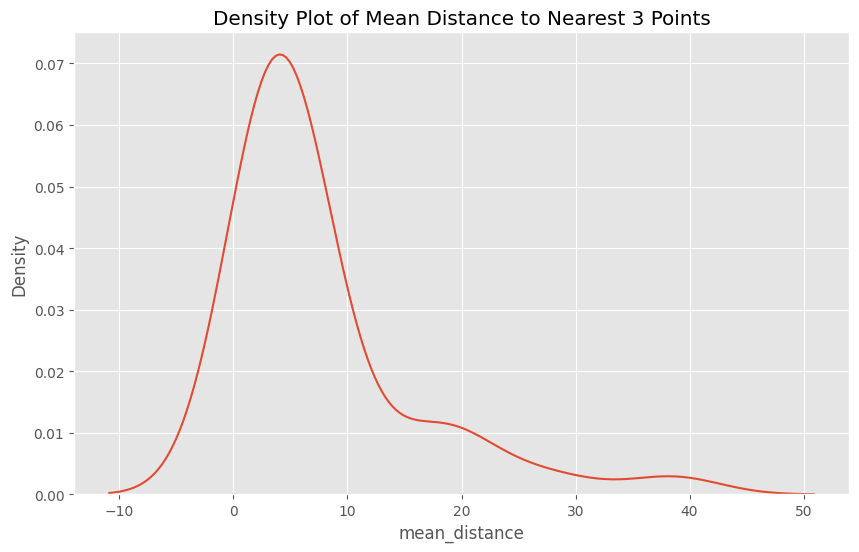

Mean: 7.64402344660204
Median: 4.5678761443601115
Mode: 1.452812168042417


In [19]:
# density plot of the mean distance to the nearest 3 points
plt.figure(figsize=(10, 6))
sns.kdeplot(df['mean_distance'])
plt.title('Density Plot of Mean Distance to Nearest 3 Points')
plt.show()
# print mean median and mode
print('Mean:', df['mean_distance'].mean())
print('Median:', df['mean_distance'].median())
print('Mode:', df['mean_distance'].mode()[0])